### 예제 1

어느 시장 조사기관은 여러 가지 대중매체가 주는 정보의 양을 비교하기 위해 다음과 같은 실험을 계획하 였다. 40명의 성인을 랜덤하게 추출하여 철저한 면접을 통해 TV, 신문, 라디오, 잡지 중 어느 매체를 많이 접하는지 에 따라 분류하였다. 다음 표는 최근에 일어난 사건들에 대한 조사 대상자들의 인지도를 측정한 실험에서 얻어진 값들을 나타내고, 값이 클수록 인지도가 높은 것을 의미한다. 이 자료를 이용하여 사람들의 인지도가 대중매체에 따라 다르다고 할 수 있는지 유의수준 5%에서 검정해보자

In [1]:
import numpy as np
import pandas as pd

num = np.array([16, 19, 25, 22, 21, 15, 16, 22, 21, 18, # 10
               13, 14, 15, 16, 15, 13, 19, 16, 20, 14, 11, # 11
               18, 18, 15, 14, 14, 10, 18, 15, 15, # 9
               11, 15, 17, 17, 13, 14, 16, 13, 11]) # 9
col = np.concatenate([np.repeat(1, 10), np.repeat(2, 11), np.repeat(3, 9), np.repeat(4, 9)])
data = pd.DataFrame({'awareness': num, 'media': col})
data.head()

,awareness,media
0,16,1
1,19,1
2,25,1
3,22,1
4,21,1


**풀이**

분산분석 중 일원 배치법을 이용한다.
- 모형: `Yij = m + Ai + Eij` (i = 1, ..., 4) (j = 1, ..., Ni)
    - m: 총평균
    - i는 매체를 나타내는 index
    - j는 각 매체에 대해 조사된 대상자의 index
    - Eij: 오차항
        - 서로 독립이며 N(0, σ^2)를 따르는 확률변수로 가정한다.
- 가설
    - H0: A1 = A2 = A3 = A4 = 0
    - H1: 적어도 한 Ai는 0이 아니다.
- 귀무가설 하의 검정통계량 관측값
    - F = 7.593032
- 유의확률
    - p = 0.000488
- 유의성 판단 및 결론
    - 유의확률이 유의수준 0.05 이하로 매우 작은 것으로 나타났다. 따라서 유의수준 5% 하에서 모평균이 모두 동일하다는 귀무가설을 기각할 통계적 근거가 충분하다. 즉 **대중매체에 따라 사람들의 인지도에 차이가 있다**고 볼 수 있다.
    

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('awareness ~ C(media)', data = data).fit()
table = sm.stats.anova_lm(model, typ = 1)
print(table)

            df      sum_sq    mean_sq         F    PR(>F)
C(media)   3.0  169.120824  56.373608  7.593032  0.000488
Residual  35.0  259.853535   7.424387       NaN       NaN


### 예제 2
어느 회사의 마케팅 부서에서는 하나의 상품에 대해 세 가지 다른 디자인의 포장을 적용한 후 이 상품들을 서로 다른 5군데의 상점에서 한 달 동안 판매하였다. 그리고 그 판매 결과는 아래와 같다. 제품의 매출은 판매되는 상점과 제품의 포장 디자인에 따라 다르다고 할 수 있는가? 적절한 가설을 쓰고 유의수준 5%에서 이를 검정하시오.



In [16]:
import seaborn
import matplotlib.pyplot as plt

y = np.array([210, 230, 190, 180, 190,
               195, 170, 200, 190, 193,
               295, 275, 290, 275, 265])
store = np.tile(range(1, 6), 3)
design = np.repeat(range(1, 4), 5)
mkt_data = pd.DataFrame({'store': store, 'design': design, 'y': y})
mkt_data.head()

,store,design,y
0,1,1,210
1,2,1,230
2,3,1,190
3,4,1,180
4,5,1,190


**풀이**

상점의 종류와 제품의 포장 디자인이라는 두 가지 설명변수를 고려해야 하므로 반복이 없는 이원배치법을 적용한다.
- 모형: `Yij = m + Ai + Bj + Eij` (i = 1, ..., 5) (j = 1, 2, 3)
    - m: 총평균
    - i는 상점의 종류를 나타내는 index
        - Ai: 상점의 종류의 i번째 수준의 효과
    - j는 포장 디자인을 나타내는 index
        - Bi: 포장 디자인의 j번째 수준의 효과
    - Eij: 오차항
        - 서로 독립이며 N(0, σ^2)를 따르는 확률변수로 가정한다.
- 인자 A의 효과
    - 가설
        - H0: A1 = A2 = A3 = A4 = A5 = 0
        - H1: 적어도 한 Ai는 0이 아니다.
    - 귀무가설 하의 검정통계량 관측값
        - F = 0.703284
    - 유의확률
        - p = 0.611391
    - 유의성 판단 및 결론
        - 유의확률이 유의수준 0.05보다 매우 큰 것으로 나타났다. 따라서 유의수준 5% 하에서 귀무가설을 기각할 통계적 근거가 충분하지 않다. 즉 **판매되는 상점에 따라 제품의 매출에는 유의한 차이가 없다**고 볼 수 있다.
- 인자 B의 효과
    - 가설
        - H0: B1 = B2 = B3 = 0
        - H1: 적어도 한 Bi는 0이 아니다.
    - 귀무가설 하의 검정통계량 관측값
        - F = 48.398787
    - 유의확률
        - p = 0.000034
    - 유의성 판단 및 결론
        - 유의확률이 유의수준 0.05 이하로 매우 작은 것으로 나타났다. 따라서 유의수준 5% 하에서 귀무가설을 기각할 통계적 근거가 충분하다. 즉 **포장 디자인에 따라 제품의 매출에 유의한 차이가 있다**고 볼 수 있다.

In [4]:
model = ols('y ~ C(store) + C(design)', data = mkt_data).fit()
table = sm.stats.anova_lm(model, typ = 2)
print(table)

                 sum_sq   df          F    PR(>F)
C(store)     711.066667  4.0   0.703284  0.611391
C(design)  24467.200000  2.0  48.398787  0.000034
Residual    2022.133333  8.0        NaN       NaN


### 예제 3

남녀의 성별과 고단백질로 구성된 아침 식사의 섭취 여부가 성인의 신체적 활동 능력에 영향을 미치는지를 알아보기 위하여 랜덤하게 선택된 남녀 10명에 대해 각각 5명씩 고단백질 아침식사와 저단백질 아침식사를 섭취 하게 한 후, 신체적 능력을 테스트를 통해 측정하였다. 측정된 점수가 높을수록 신체 활동 능력이 더 우수하다는 것을 의미한다. 실험 결과가 아래와 같을 때, 주어진 자료에 대해 이원배치법을 적용한 후 그 결과를 해석하여라.

In [9]:
y = np.array([10, 7, 9, 6, 8,
             5, 4, 7, 4, 5,
             5, 4, 6, 3, 2,
             3, 4, 5, 1, 2])
protein = np.repeat(range(1, 5), 5)
gender = np.repeat(range(1, 3), 10)

meal_data = pd.DataFrame({'protein': protein, 'gender': gender, 'y': y})
meal_data.head()

,protein,gender,y
0,1,1,10
1,1,1,7
2,1,1,9
3,1,1,6
4,1,1,8


**풀이**

남녀의 성별(B)와 단백질 포함 정도(A)에 대한 상호작용의 유무를 평균그림(interaction plot)을 통해 확인해보자. 평균 그림 확인 결과, **두 요인 사이에는 상호작용이 존재하지 않는 것**으로 보인다.

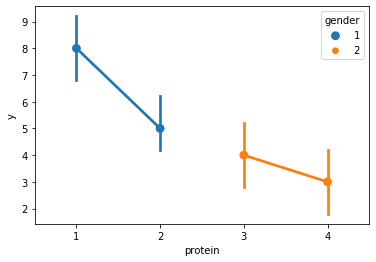

In [21]:
seaborn.pointplot(x = "protein", y = "y", hue = "gender", data = meal_data)
plt.show()

성별과 단백질 포함 정도라는 두 가지 설명변수를 고려해야 하므로 반복이 있는 이원배치법을 적용한다. 이때 상호작용이 존재하지 않기 때문에 곱이 아닌 합으로 표현하여 시행한다.
- 모형: `Yij = m + Ai + Bj + Eij` (i = 1, 2) (j = 1, 2)
    - m: 총평균
    - i는 단백질 포함 정도를 나타내는 index
        - Ai: 상점의 종류의 i번째 수준의 효과
    - j는 성별 나타내는 index
        - Bi: 포장 디자인의 j번째 수준의 효과
    - Eij: 오차항
        - 서로 독립이며 N(0, σ^2)를 따르는 확률변수로 가정한다.
- 인자 A 단백질 포함 정도의 효과
    - 가설
        - H0: A1 = A2 = 0
        - H1: 적어도 한 Ai는 0이 아니다.
    - 귀무가설 하의 검정통계량 관측값
        - F = 10.37037
    - 유의확률
        - p = 0.000494
    - 유의성 판단 및 결론
        - 유의확률이 유의수준 0.05이하로 매우 작은 것으로 나타났다. 따라서 유의수준 5% 하에서 귀무가설을 기각할 통계적 근거가 충분하다. 즉 **단백질 포함 정도에 따라 성인의 신체적 활동 능력에는 유의한 차이가 있다**고 볼 수 있다.
- 인자 B의 효과
    - 가설
        - H0: B1 = B2 = 0
        - H1: 적어도 한 Bi는 0이 아니다.
    - 귀무가설 하의 검정통계량 관측값
        - F = 30.00
    - 유의확률
        - p = 0.000051
    - 유의성 판단 및 결론
        - 유의확률이 유의수준 0.05 이하로 매우 작은 것으로 나타났다. 따라서 유의수준 5% 하에서 귀무가설을 기각할 통계적 근거가 충분하다. 즉 **성별에 따라 성인의 신체적 활동 능력에는 유의한 차이가 있다**고 볼 수 있다.

In [27]:
model = ols('y ~ C(protein) + C(gender)', data = meal_data).fit()
table = sm.stats.anova_lm(model, typ = 2)
print(table)

            sum_sq    df         F    PR(>F)
C(protein)    70.0   3.0  10.37037  0.000494
C(gender)     67.5   1.0  30.00000  0.000051
Residual      36.0  16.0       NaN       NaN
